# Association Rules for Movies

In [10]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [11]:
# read the dataset
movies = pd.read_csv("/Users/zihualai/Desktop/ml-latest-small/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
# one hot encoding for the genres of movies. We don't need ID and title for modelling. 
movies_ohe = movies.drop('genres',axis = 1).join(movies.genres.str.get_dummies())
pd.options.display.max_columns = 100
movies_ohe.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# Observe the genres
movies_ohe.shape

(9742, 22)

So there are 9742 movies and 20 different genres of movies (22 columns - movie Id column - title column)

In [14]:
# Change movieId AND title which are not related to basket to index
movies_ohe.set_index(['movieId', 'title'], inplace = True)
movies_ohe.head()

,,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,title,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
frequent_itemsets_movies = apriori(movies_ohe, use_colnames = True, min_support = 0.02)
frequent_itemsets_movies

/Users/zihualai/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.187641,(Action)
1,0.129645,(Adventure)
2,0.062718,(Animation)
3,0.068158,(Children)
4,0.385547,(Comedy)
5,0.123075,(Crime)
6,0.045165,(Documentary)
7,0.447649,(Drama)
8,0.079963,(Fantasy)
9,0.100390,(Horror)


In [22]:
rules = association_rules(frequent_itemsets_movies, metric = 'lift', min_threshold = 1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Adventure),(Action),0.129645,0.187641,0.062615,0.482977,2.573940,0.038289,1.571224,0.702576
1,(Action),(Adventure),0.187641,0.129645,0.062615,0.333698,2.573940,0.038289,1.306247,0.752735
2,(Action),(Crime),0.187641,0.123075,0.042907,0.228665,1.857929,0.019813,1.136892,0.568426
3,(Crime),(Action),0.123075,0.187641,0.042907,0.348624,1.857929,0.019813,1.247142,0.526575
4,(Action),(Fantasy),0.187641,0.079963,0.021351,0.113786,1.422977,0.006346,1.038165,0.365907
...,...,...,...,...,...,...,...,...,...,...
65,"(Crime, Drama)",(Thriller),0.065387,0.194416,0.031718,0.485086,2.495096,0.019006,1.564503,0.641136
66,"(Thriller, Drama)",(Crime),0.085403,0.123075,0.031718,0.371394,3.017617,0.021207,1.395031,0.731047
67,(Crime),"(Thriller, Drama)",0.123075,0.085403,0.031718,0.257715,3.017617,0.021207,1.232136,0.762452
68,(Thriller),"(Crime, Drama)",0.194416,0.065387,0.031718,0.163147,2.495096,0.019006,1.116818,0.743825


In [23]:
filtered_rules = rules[(rules['lift'] > 3) & (rules['confidence'] > 0.2)]

In [24]:
sorted_rules = filtered_rules.sort_values(by='lift', ascending=False)

In [25]:
print(sorted_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


            antecedents          consequents   support  confidence      lift
18          (Animation)           (Children)  0.031000    0.494272  7.251799
19           (Children)          (Animation)  0.031000    0.454819  7.251799
25           (Children)            (Fantasy)  0.021454    0.314759  3.936306
24            (Fantasy)           (Children)  0.021454    0.268293  3.936306
13           (Children)          (Adventure)  0.032026    0.469880  3.624360
12          (Adventure)           (Children)  0.032026    0.247031  3.624360
47  (Adventure, Sci-Fi)             (Action)  0.020530    0.653595  3.483217
48     (Action, Sci-Fi)          (Adventure)  0.020530    0.443459  3.420568
14          (Adventure)            (Fantasy)  0.034285    0.264450  3.307149
15            (Fantasy)          (Adventure)  0.034285    0.428755  3.307149
46  (Adventure, Action)             (Sci-Fi)  0.020530    0.327869  3.259284
51             (Sci-Fi)  (Adventure, Action)  0.020530    0.204082  3.259284

Analysis: 
The highest lift values are for rules involving Animation and Children genres, which means these two genres have a very strong association in your dataset.

Rules involving Adventure and Sci-Fi also show a strong association, with a lift over 3.

The confidence levels vary, but some rules have relatively high confidence, suggesting strong predictive power.
For example, the rule (Adventure, Sci-Fi) => (Action) has a confidence of over 65%, indicating a strong likelihood that movies with both Adventure and Sci-Fi genres will also have Action as a genre.

In [31]:
# Explore what genres will be driven by child
# Filter the rules to find only those where 'Children' is the antecedent
children_rules = rules[rules['antecedents'] == {'Children'}]

# Sort the rules by confidence or lift to find the strongest associations
sorted_children_rules = children_rules.sort_values(by='lift', ascending=False)

# Display the consequents with the highest lift values
print(sorted_children_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


   antecedents  consequents   support  confidence      lift
19  (Children)  (Animation)  0.031000    0.454819  7.251799
25  (Children)    (Fantasy)  0.021454    0.314759  3.936306
13  (Children)  (Adventure)  0.032026    0.469880  3.624360
23  (Children)     (Comedy)  0.037159    0.545181  1.414044


So, the children genre will drive animation, fantasy, adventure and comedy. 

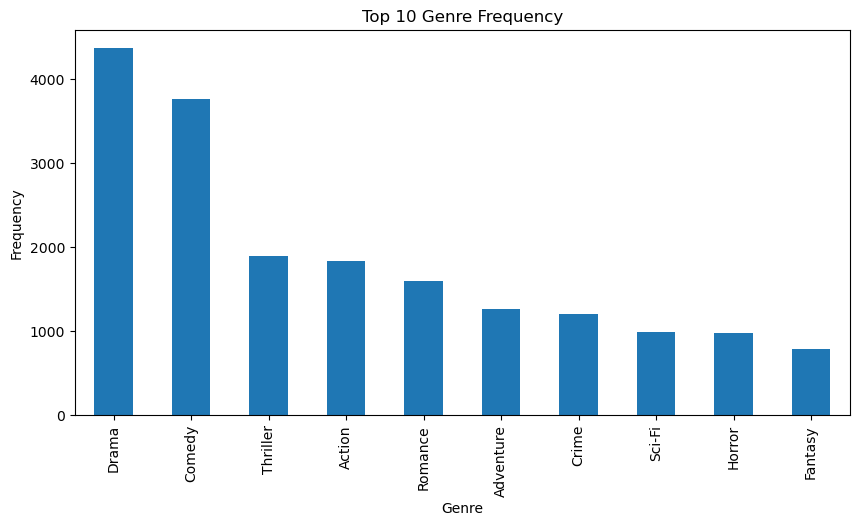

In [27]:
# Frequency Plot
# Calculate the frequency of each genre
genre_frequency = movies_ohe.sum().sort_values(ascending=False)

# Plot the frequency of the top N genres
top_n = 10
genre_frequency[:top_n].plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Genre Frequency')
plt.ylabel('Frequency')
plt.xlabel('Genre')
plt.show()

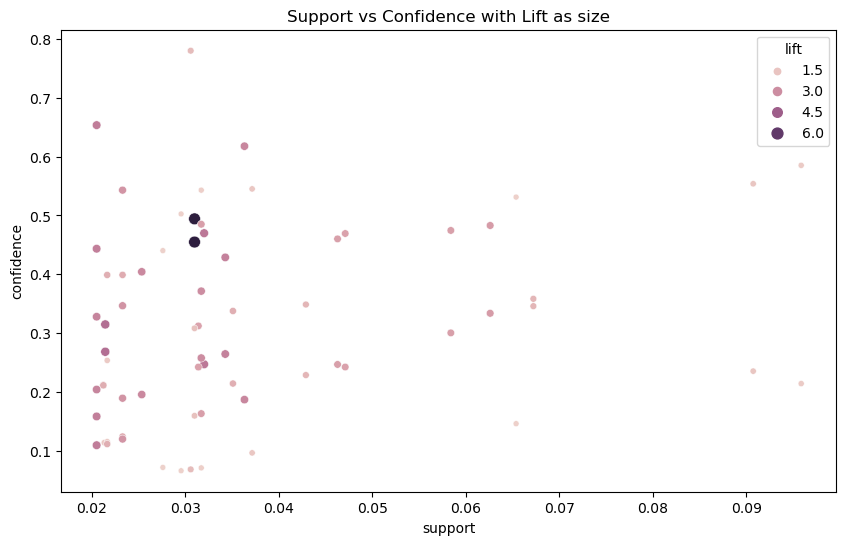

In [29]:
# Visualizing Rules
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules)
plt.title('Support vs Confidence with Lift as size')
plt.show()


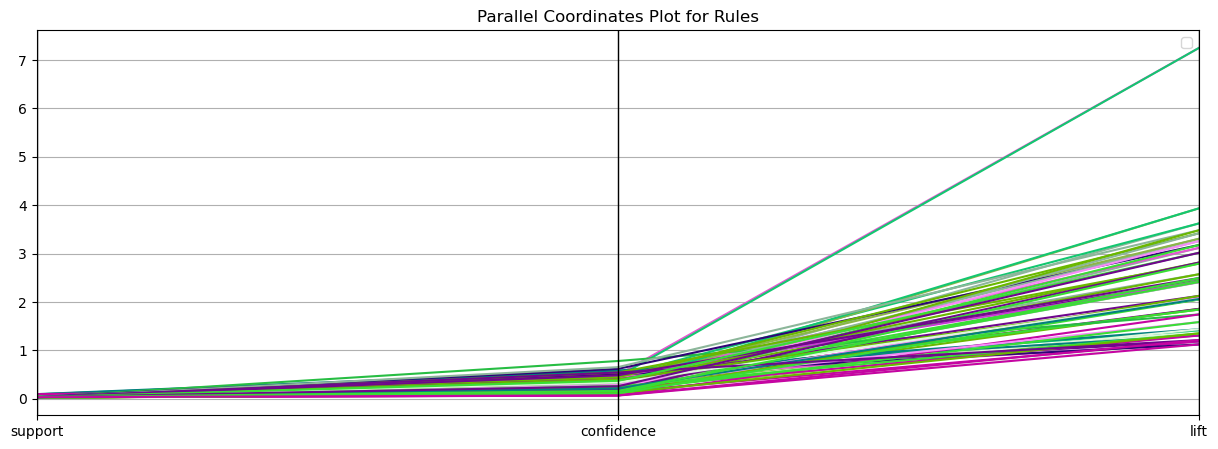

In [30]:
# for a parallel coordinates plot for rules
from pandas.plotting import parallel_coordinates

# Transform the rules DataFrame for use with parallel_coordinates
rules_for_plotting = rules.copy()
rules_for_plotting['antecedents'] = rules_for_plotting['antecedents'].apply(lambda x: list(x)[0])
rules_for_plotting['consequents'] = rules_for_plotting['consequents'].apply(lambda x: list(x)[0])

plt.figure(figsize=(15, 5))
parallel_coordinates(rules_for_plotting, class_column='antecedents', cols=['support', 'confidence', 'lift'])
plt.title('Parallel Coordinates Plot for Rules')
plt.legend([])
plt.show()
